In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("datasets/polynomial-regression.csv")
data

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


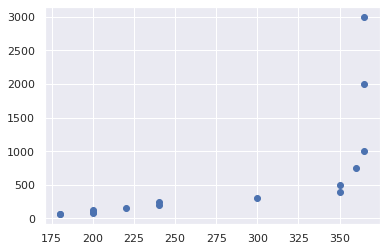

In [3]:
X = data["araba_max_hiz"].values.reshape(-1,1)
y = data["araba_fiyat"]

plt.scatter(X, y)

In [4]:
skala = StandardScaler()
X = skala.fit_transform(X)
X

array([[-1.26213577],
       [-1.26213577],
       [-0.99454515],
       [-0.99454515],
       [-0.99454515],
       [-0.72695453],
       [-0.4593639 ],
       [-0.4593639 ],
       [ 0.34340797],
       [ 1.01238453],
       [ 1.01238453],
       [ 1.14617984],
       [ 1.21307749],
       [ 1.21307749],
       [ 1.21307749]])

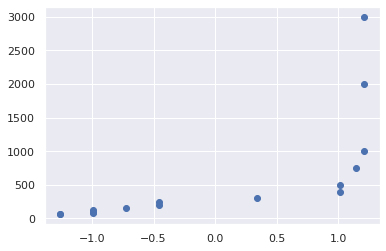

In [5]:
plt.scatter(X, y)

In [6]:
poly = PolynomialFeatures(degree=4, include_bias=True)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.        , -1.26213577,  1.59298671, -2.01056552,  2.53760667],
       [ 1.        , -1.26213577,  1.59298671, -2.01056552,  2.53760667],
       [ 1.        , -0.99454515,  0.98912006, -0.98372456,  0.97835849],
       [ 1.        , -0.99454515,  0.98912006, -0.98372456,  0.97835849],
       [ 1.        , -0.99454515,  0.98912006, -0.98372456,  0.97835849],
       [ 1.        , -0.72695453,  0.52846288, -0.38416849,  0.27927302],
       [ 1.        , -0.4593639 ,  0.2110152 , -0.09693276,  0.04452741],
       [ 1.        , -0.4593639 ,  0.2110152 , -0.09693276,  0.04452741],
       [ 1.        ,  0.34340797,  0.11792903,  0.04049777,  0.01390726],
       [ 1.        ,  1.01238453,  1.02492243,  1.03761561,  1.05046598],
       [ 1.        ,  1.01238453,  1.02492243,  1.03761561,  1.05046598],
       [ 1.        ,  1.14617984,  1.31372822,  1.5057688 ,  1.72588184],
       [ 1.        ,  1.21307749,  1.47155701,  1.78511268,  2.16548002],
       [ 1.        ,  1.21307749,  1.4

In [7]:
model = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

(376.481425701341,
 array([    0.        ,  -787.77817019, -1349.68989124,  1028.79917497,
         1181.38547112]))

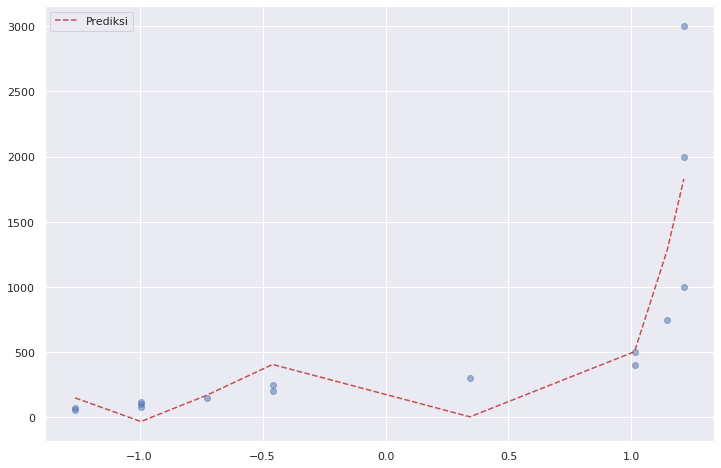

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X_poly), "r--", label="Prediksi")
plt.legend();

In [9]:
X.shape, model.predict(X_poly).shape

((15, 1), (15,))

In [122]:
model.score(X_poly, y)

0.7350758109035251